<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-b-color-and-tone-correction/blob/develop/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

from zipfile import ZipFile

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with ZipFile('/content/gdrive/MyDrive/huawei10000/huawei10000.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path="/content/gdrive/MyDrive/huawei10000/")

In [ ]:
with ZipFile('/content/gdrive/MyDrive/canon10000/canon10000.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path="/content/gdrive/MyDrive/canon10000/")

In [34]:
with ZipFile('/content/gdrive/MyDrive/DPED-master/DPED-master.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path="/content/gdrive/MyDrive/DPED-master/")

In [ ]:
with ZipFile('/content/gdrive/MyDrive/canon_test.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path="/content/gdrive/MyDrive/canon_test/")

In [ ]:
with ZipFile('/content/gdrive/MyDrive/huawei_test.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path="/content/gdrive/MyDrive/huawei_test/")

In [ ]:
image = cv2.imread("/content/gdrive/MyDrive/huawei10000/huawei/0.jpg")

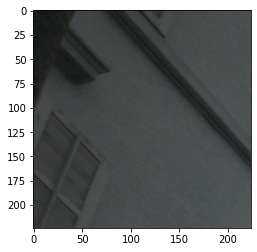

In [ ]:
plt.imshow(image)

In [ ]:
sys.path.append('/content/gdrive/MyDrive/DPED-master/DPED-master')

In [3]:
%cd /content/gdrive/MyDrive/DPED-master/DPED-master/

/content/gdrive/MyDrive/DPED-master/DPED-master


In [4]:
!python load_dataset.py model=iphone

In [ ]:
!python train_model.py model=iphone train_size=10019

2021-01-31 15:32:35.357095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Instructions for updating:
non-resource variables are not supported in the long term

The following parameters will be applied for CNN training:

Phone model: iphone
Batch size: 50
Learning rate: 0.0005
Training iterations: 20000

Content loss: 10
Color loss: 0.5
Texture loss: 1
Total variation loss: 2000

Path to DPED dataset: dped/
Path to VGG-19 network: vgg_pretrained/imagenet-vgg-verydeep-19.mat
Evaluation step: 1000

2021-01-31 15:32:37.456443: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 15:32:37.457371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-31 15:32:37.478779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), 

In [ ]:
!python vgg.py

In [ ]:
import vgg

In [8]:
image = cv2.imread('/content/gdrive/MyDrive/huawei_100/huawei_100_train/0.jpg')
shape = image.shape
x = np.expand_dims(image,1)

In [ ]:
model = vgg.net('/content/gdrive/MyDrive/DPED-master/DPED-master/vgg_pretrained/imagenet-vgg-verydeep-19.mat', x)

In [ ]:
!python test_model.py model=iphone iteration=1000 test_subset=full resolution=medium use_gpu=true